<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Proaño Rhon, Leonardo Francisco**

**22-02-2022**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [55]:
#%pip install -r requirements.txt
%reload_ext autoreload
%autoreload 2
import importlib
import miningscience
importlib.reload(miningscience)
# Escriba aquí su código para el ejercicio 1
import miningscience as msc

print("Descripción de l funcion download_pubmed:")
help(msc.download_pubmed)

print("Descripción de la funcion mining_pubs:")
help(msc.mining_pubs)

Descripción de l funcion download_pubmed:
Help on function download_pubmed in module miningscience:

download_pubmed(keyword: str)
    Función que permite descargar los ids de PubMed utilizando ENTREZ de Biopython.
    El parámtero es la keyword es el término de búsqueda.

Descripción de la funcion mining_pubs:
Help on function mining_pubs in module miningscience:

mining_pubs(tipo: str) -> pandas.core.frame.DataFrame
    Según el parámetro tipo, se descargan los ids de PubMed de la búsqueda:
        Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
        Si el tipo es "AU" recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
        Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un dataframe con el country y el num_auth.




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [56]:
# Ahora escribimos el código para llamar a download_pubmed para descargar la data de Ecuador genomics
records = msc.download_pubmed("Ecuador genomics")
records_count = records["Count"]
first_element_id = records["IdList"][0]
print(f"El número de artículos es: {records_count}") # xx corresponde al número de artículos recuperados

print(f"El PMID del primer artículo es: {first_element_id}") # xxxxxxxx corresponde al ID del artículo en PUDMED

El número de artículos es: 193
El PMID del primer artículo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [57]:
# Para el ejercicio 3 se utilizó la función mining_pubs para crear dataframes de pub_year, pub_authors y countries
print("Dataframe de articulos con año:")
df_pub_year = msc.mining_pubs("DP")
print(df_pub_year.head(2))
print(df_pub_year.tail(2))
print('-------------------------------------------')


print("\nDataframe de articulos con autores:")
df_pub_authors = msc.mining_pubs("AU")
print(df_pub_authors.head(2))
print(df_pub_authors.tail(2))
print('-------------------------------------------')


print("\nDataframe de número de articulos por pais:")
df_countries = msc.mining_pubs("AD")
print(df_countries.head(2))
print(df_countries.tail(2))

Dataframe de articulos con año:
       PMID  DP_year
0  35121084     2022
1  35120121     2022
         PMID  DP_year
191  17187350     2007
192   8661097     1996
-------------------------------------------

Dataframe de articulos con autores:
       PMID  num_auth
0  35121084        12
1  35120121        14
         PMID  num_auth
189  19177531         7
190  19018989         1
-------------------------------------------

Dataframe de número de articulos por pais:
         country  num_auth
0  United States        12
1  United States        14
           country  num_auth
190        England         1
191  United States         9


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


DP_year    2019.0
dtype: float64


Text(-3.74922, 40.463667, 'Spain')

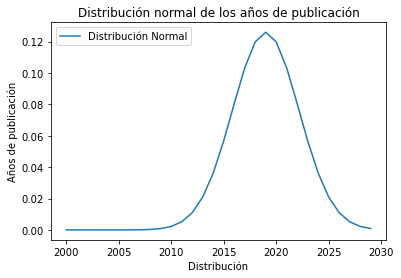

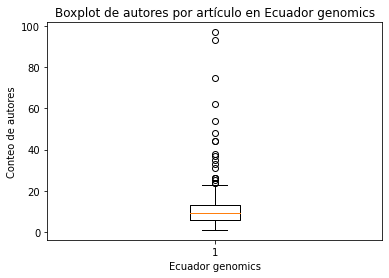

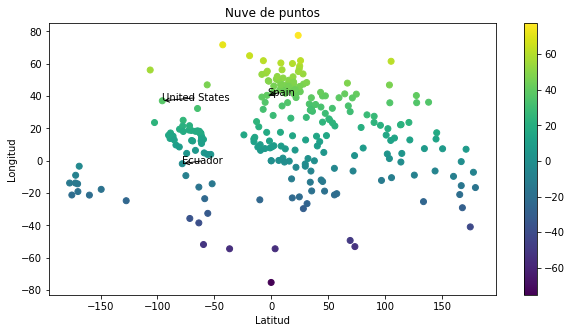

In [58]:
# En el ejercicio 4 se presenta el siguiente código
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# df_pub_yer
pun_year_median = df_pub_year.median(numeric_only=True)
pub_year_standar_deviation = df_pub_year.std(numeric_only=True)


x_axis = np.arange(2000, 2030, 1)

fig1, ax1 = plt.subplots()

label = "Distribución Normal"
print(pun_year_median)
ax1.plot(x_axis, norm.pdf(x_axis, pun_year_median[0], pub_year_standar_deviation[0]), label=label)
ax1.set_title("Distribución normal de los años de publicación")
ax1.set_xlabel("Distribución")
ax1.set_ylabel("Años de publicación")
ax1.legend(loc = "upper left")




# df_pub_authors

df_pub_authors.drop(df_pub_authors[df_pub_authors['num_auth'] > 100].index, inplace=True) # Normalizamos los datos
df_pub_authors.sort_values(by="num_auth", ascending=False, inplace=True) # Ordenamos

fig2, ax2 = plt.subplots()

ax2.boxplot(df_pub_authors["num_auth"])
plt.title('Boxplot de autores por artículo en Ecuador genomics')
plt.xlabel('Ecuador genomics')
plt.ylabel('Conteo de autores')





# df_countries

# Leelos la latitud y longitud de los paises
countries_lat_lon = pd.read_csv('./data/countries.csv', engine='python', skipfooter=3)

countries_lat_lon['name'] = countries_lat_lon['name'].str.lower()
countries_lat_lon = countries_lat_lon.rename(columns={'name': 'country_name'})

#countries_lat_lon = countries_lat_lon[countries_lat_lon["name"].isin(df_countries["country"].to_list())]


df_countries['country'] = df_countries['country'].str.lower()

df_countries = df_countries.rename(columns={'country': 'country_name'})

joined_data = pd.concat([df_countries, countries_lat_lon]).groupby(['country_name']).sum()

joined_data = joined_data[joined_data['num_auth'].notna()]


plt.figure(figsize=(10,5))
plt.title('Nuve de puntos')
plt.xlabel('Latitud')
plt.ylabel('Longitud')


plt.scatter(joined_data['longitude'], joined_data['latitude'], c=joined_data['latitude'], marker='o', label='Puntos')
plt.colorbar()

plt.annotate('Ecuador', xy= (joined_data.loc['ecuador']['longitude'], joined_data.loc['ecuador']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('United States', xy= (joined_data.loc['united states']['longitude'], joined_data.loc['united states']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Spain', xy= (joined_data.loc['spain']['longitude'], joined_data.loc['spain']['latitude']), arrowprops={'arrowstyle': '->'})

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

En los resultados del ejercicio 4

## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [5]:
# Escriba aquí su código para el ejercicio 6
from Bio import Entrez
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os


with open("./data/sequence.seq") as s:#llamo a la base de datos donde estan las IDs
    Entrez.email = "leonardo.proano@est.ikiam.edu.ec" 
    handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="AH005464.2, KP972457.1, KP972456.1, KP972455.1, KJ917183.1, KJ917182.1, KJ917181.1, KJ917180.1, KJ917179.1, KC967646.1")
print(handle)
for seq_record in SeqIO.parse(handle, "gb"): 
            print("%s %s..." % (seq_record.id, seq_record.description[:100])) 
            print( "Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                                  len(seq_record.features), 
                                                                  seq_record.annotations["source"], ) )

#Cargar data multiple y hacer los alineamientos\n
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "./data/sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

ClustalAlign = AlignIO.read("data/sequence.aln", "clustal")#nucleotidos parecidos entre las especies identificadas por IDs
print(ClustalAlign)

#CREACION del dendograma por clados de la filogenia de cada sepa del monstruo de Gila (Heloderma suspectum)
tree = Phylo.read("data/sequence.dnd", "newick")
Phylo.draw_ascii(tree)

<_io.TextIOWrapper encoding='UTF-8'>
AH005464.2 Heloderma suspectum 12S ribosomal RNA genes, partial sequence; mitochondrial...
Sequence length 758, 5 features, from: mitochondrion Heloderma suspectum (Gila monster)
KP972457.1 Heloderma suspectum haplotype HESU_12S_Hap03 tRNA-Phe gene, partial sequence; 12S ribosomal RNA and ...
Sequence length 1195, 5 features, from: mitochondrion Heloderma suspectum (Gila monster)
KP972456.1 Heloderma suspectum haplotype HESU_12S_Hap02 tRNA-Phe gene, partial sequence; 12S ribosomal RNA and ...
Sequence length 1195, 5 features, from: mitochondrion Heloderma suspectum (Gila monster)
KP972455.1 Heloderma suspectum haplotype HESU_12S_Hap01 tRNA-Phe gene, partial sequence; 12S ribosomal RNA and ...
Sequence length 1195, 5 features, from: mitochondrion Heloderma suspectum (Gila monster)
KJ917183.1 Heloderma suspectum haplotype 02 cytochrome c oxidase subunit I (COI) gene, partial cds; mitochondri...
Sequence length 658, 3 features, from: mitochondrion Helo

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```